# Constituent Parsing Data Analysis

In [ ]:
import os
import sys
import pandas as pd

from codelin.models.const_tree import *
from codelin.models.const_label import *
from codelin.models.linearized_tree import *


dataset_path = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks"
    
def ctree_data_analysis(f_in):
    tree_counter = 0
    avg_branch_factor = 0
    branch_dir = {'R':0, 'L':0}
    width = 0
    depth = 0
    for line in f_in:
        line = line.rstrip()
        tree = C_Tree.from_string(line)
        tree_counter += 1

        avg_branch_factor += tree.average_branching_factor()
        width += len(tree.get_words())
        depth += tree.depth()
        branch_dir['R'] += tree.branching()['R']
        branch_dir['L'] += tree.branching()['L']

    avg_branch_factor /= tree_counter
    width /= tree_counter
    depth /= tree_counter
    branch_dir['R'] /= tree_counter
    branch_dir['L'] /= tree_counter

    return tree_counter, avg_branch_factor, width, depth, branch_dir

         

tetratag_orders = ['preorder','inorder','postorder']
def get_files(path):
    trees_files = []
    for root, dirs, fs in os.walk(path):
        for f in fs:
            if f.endswith('.json'):
                continue    
            if f.endswith('.trees'):
                language = root.split('\\')[-1]
                split = f.split('.')[0]
                with open(os.path.join(root, f), 'r', encoding='utf-8') as f_in:
                    num_trees, avg_branch_factor, width, depth, branch_dir = ctree_data_analysis(f_in)
                trees_files.append((language, split, num_trees, avg_branch_factor, width, depth, branch_dir['R'], branch_dir['L']))
            
    
    
    return trees_files

trees_files = get_files(dataset_path)

trees_df = pd.DataFrame(trees_files, columns=['language', 'split', 'num_trees', 'avg_branch_factor', 'width', 'depth', 'branch_dir_R', 'branch_dir_L'])
trees_df = trees_df.sort_values(by=['language', 'split'])
trees_df = trees_df.reset_index(drop=True)
trees_df = trees_df.groupby(['language']).agg({'num_trees': 'sum', 'avg_branch_factor': 'mean', 'width': 'mean', 'depth': 'mean', 'branch_dir_R': 'mean', 'branch_dir_L': 'mean'}).reset_index()

print(trees_df.to_latex(index=False))



In [6]:
import sys
sys.path.append('..')

import os
import pandas as pd

from codelin.models.const_tree import *
from codelin.models.const_label import *
from codelin.models.linearized_tree import *

from codelin.encs.constituent import *



dataset_path = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks"
encodings = [
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="close"),
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="open"),
            
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="open", reverse=True),
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="close", reverse=True),
            
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="close"),
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="open"),

            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="open", reverse=True),
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="clse", reverse=True),

             
            # C_Tetratag(separator="[_]", unary_joiner="[+]", mode="inorder", binary_marker="[b]"),
             
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R"),
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R", binary_marker="[b]"),
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L", binary_marker="[b]")
            ]

label_stats_df = pd.DataFrame(columns=['encoding', 'en', 'fr', 'de', 'he', 'hu', 'ko', 'pl', 'sv' ])


labels_dict = {}
def analysis(dataset_path):
    for root, dirs, fs in os.walk(dataset_path):
        tree_counter=0
        
        label_set = set()
        # nc_set = set()
        # lc_set = set()
        # uc_set = set()
        
        trees = []
        if fs == []:
            continue
        for f in fs:
            if f.endswith('.trees'):
                language= root.split('\\')[-1]
                file_path = os.path.join(root, f)
                for x in C_Tree.read_trees_file(file_path):
                    trees.append(x)
                    tree_counter += 1
                
        
        ntrees = tree_counter
        for enc in encodings:
            enc_name = str(enc)
            enc_name = enc_name.lower()
            enc_name = enc_name.replace('encoding', '')
            enc_name = enc_name.replace('constituent', '')
            enc_name = "_".join(enc_name.split(" "))
            if hasattr(enc, 'binary') and enc.binary:
                enc_name += "_bin_" + enc.binary_direction
            if hasattr(enc, 'reverse') and enc.reverse:
                enc_name += "_incr_"
            if hasattr(enc, 'mode') and enc.mode:
                enc_name += "_mode_"+enc.mode

            for t in trees:
                lin_tree = enc.encode(t)    
                for lbl in lin_tree.labels:
                    label_set.add(str(lbl))
                    # nc_set.add(str(lbl.n_commons))
                    # lc_set.add(str(lbl.last_common))
                    # uc_set.add(str(lbl.unary_chain))
            
                
            
            # label_stats_df.loc[enc_name, language] = (len(label_set), len(nc_set), len(lc_set), len(uc_set))
            if enc_name not in labels_dict:
                labels_dict[enc_name] = {}
            if language not in labels_dict[enc_name]:
                # labels_dict[enc_name][language] = (0, 0, 0, 0)
                labels_dict[enc_name][language] = 0
            
            # labels_dict[enc_name][language] = (len(label_set), len(nc_set), len(lc_set), len(uc_set))
            labels_dict[enc_name][language] = len(label_set)

            label_set.clear()
            # nc_set.clear()
            # lc_set.clear()
            # uc_set.clear()

analysis(dataset_path)
label_stats_df = pd.DataFrame.from_dict(labels_dict)
label_stats_df = label_stats_df.T
label_stats_df = label_stats_df.reset_index()
print(label_stats_df.to_latex(index=False, float_format='%.2f'))

                

\begin{tabular}{lrrrrrrrrr}
\toprule
index & BASQUE_SPMRL & ENGLISH_PTB & FRENCH_SPMRL & GERMAN_SPMRL & HEBREW_SPMRL & HUNGARIAN_SPMRL & KOREAN_SPMRL & POLISH_SPMRL & SWEDISH_SPMRL \\
\midrule
_gaps_based__incr__mode_open & 1902 & 2324 & 3725 & 9732 & 13540 & 4153 & 293 & 1484 & 4378 \\
_gaps_based__incr__mode_close & 2131 & 1614 & 2568 & 9334 & 12632 & 4468 & 651 & 1565 & 4330 \\
_gaps_based__incr__mode_clse & 741 & 615 & 1058 & 5777 & 8756 & 2034 & 129 & 663 & 2360 \\
\bottomrule
\end{tabular}



In [2]:
import sys
sys.path.append('..')

import os
import pandas as pd

from codelin.models.const_tree import *
from codelin.models.const_label import *
from codelin.models.linearized_tree import *

from codelin.encs.constituent import *



dataset_path = "/home/poli/Treebanks/constituent_treebanks"
encodings = [
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveAbsoluteEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveRelativeEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=False),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R",  reverse=False, binary_marker="[b]"),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L",  reverse=False, binary_marker="[b]"),
            # C_NaiveDynamicEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R", reverse=True),
             
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="close"),
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="open"),
            
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="open", reverse=True),
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="R", binary_marker="[b]", mode="close", reverse=True),
            
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="close"),
            # C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="open"),

            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="open", reverse=True),
            C_GapsEncoding(separator="[_]", unary_joiner="[+]", binary_direction="L", binary_marker="[b]", mode="clse", reverse=True),

             
            # C_Tetratag(separator="[_]", unary_joiner="[+]", mode="inorder", binary_marker="[b]"),
             
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=False, binary_direction="R"),
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="R", binary_marker="[b]"),
            # C_JuxtaposedEncoding(separator="[_]", unary_joiner="[+]", binary=True, binary_direction="L", binary_marker="[b]")
            ]

label_stats_df = pd.DataFrame(columns=['encoding', 'en', 'fr', 'de', 'he', 'hu', 'ko', 'pl', 'sv' ])


labels_dict = {}
def analysis(dataset_path):
    for root, dirs, fs in os.walk(dataset_path):
        print(root)
        tree_counter=0
        
        label_set = set()
        nc_set = set()
        lc_set = set()
        uc_set = set()
        
        trees = []
        if fs == []:
            continue
        for f in fs:
            if f.endswith('.trees'):
                language= root.split('\\')[-1]
                file_path = os.path.join(root, f)
                for x in C_Tree.read_trees_file(file_path):
                    trees.append(x)
                    tree_counter += 1
                
        
        ntrees = tree_counter
        for enc in encodings:
            enc_name = str(enc)
            enc_name = enc_name.lower()
            enc_name = enc_name.replace('encoding', '')
            enc_name = enc_name.replace('constituent', '')
            enc_name = "_".join(enc_name.split(" "))
            if hasattr(enc, 'binary') and enc.binary:
                enc_name += "_bin_" + enc.binary_direction
            if hasattr(enc, 'reverse') and enc.reverse:
                enc_name += "_incr_"
            if hasattr(enc, 'mode') and enc.mode:
                enc_name += "_mode_"+enc.mode

            for t in trees:
                lin_tree = enc.encode(t)    
                for lbl in lin_tree.labels:
                    label_set.add(str(lbl))
                    nc_set.add(str(lbl.n_commons))
                    lc_set.add(str(lbl.last_common))
                    uc_set.add(str(lbl.unary_chain))
            
                
            
            label_stats_df.loc[enc_name, language] = (len(label_set), len(nc_set), len(lc_set), len(uc_set))
            if enc_name not in labels_dict:
                labels_dict[enc_name] = {}
            if language not in labels_dict[enc_name]:
                labels_dict[enc_name][language] = (0, 0, 0, 0)
            
            labels_dict[enc_name][language] = (len(label_set), len(nc_set), len(lc_set), len(uc_set))

            nc_set.clear()
            lc_set.clear()
            uc_set.clear()

analysis(dataset_path)
label_stats_df = pd.DataFrame.from_dict(labels_dict)
label_stats_df = label_stats_df.T
label_stats_df = label_stats_df.reset_index()
print(label_stats_df.to_latex(index=False, float_format='%.2f'))

                

/home/poli/Treebanks/constituent_treebanks
/home/poli/Treebanks/constituent_treebanks/HEBREW_SPMRL
TOP


UnboundLocalError: cannot access local variable 'n_gaps' where it is not associated with a value

Compute AVERAGE in latex table

In [ ]:
import re
# compute average of str
def compute_average(text):
    nums = re.findall(r'\d+\.\d+', text)
    nums = [float(n) for n in nums]
    return (sum(nums)/len(nums))

table=r"absolute         & 83.63        & 84.85         & 95.01       & 66.20       & 45.11         & 68.02         & 96.13         & 65.24         & xx.xx\\ \n\
        relative         & 85.82        & 85.12         & 96.53       & 82.58       & 62.15         & 71.93         & 97.55         & 76.26         & xx.xx\\ \n\
        pos-based        & 86.42        & 83.42         & 89.96       & 83.51       & \tbl{75.68}   & 51.33         & 92.11         & 78.69         & xx.xx\\ \n\
        brk              & 88.30        & 88.42         & 95.02       & 88.47       & 74.26         & 80.49         & 97.11         & 83.42         & xx.xx\\ \n\
        brk-2p$_{g}$     & 88.03        & 88.30         & 94.10       & 87.23       & 74.23         & 80.18         & 97.09         & 83.54         & xx.xx\\ \n\
        brk-2p$_{p}$     & 88.07        & 88.18         & 95.07       & 88.24       & 73.51         & \tbl{80.87}   & 97.08         & 83.28         & xx.xx\\ \n\
        brk$^d$          & 88.20        & 88.17         & 96.22       & 89.23       & 74.45         & 77.15         & 97.59         & 83.56         & xx.xx\\ \n\
        brk-2p$^{d}_{g}$ & 88.25        & 88.20         & 97.11       & 89.05       & 73.91         & 77.35         & 97.53         & 83.68         & xx.xx\\ \n\
        brk-2p$^{d}_{p}$ & 88.87        & 88.34         & 97.25       & 89.14       & 73.89         & 76.98         & 97.84         & 83.39         & xx.xx\\ \n\
        4-bits           & 89.51        & 88.81         & 95.15       & 90.71       & 63.11         & 80.15         & 97.56         & 72.15         & xx.xx\\ \n\
        7-bits           & 91.68        & 88.75         & \tbl{97.24} & 90.53       & 74.24         & 79.12         & \tbl{97.83}   & 83.72         & xx.xx\\ \n\
        hexatag          & \tbl{92.63}  & \tbl{88.83}   & 97.11       & \tbl{92.85} & 74.26         & 79.66         & 97.12         & \tbl{84.03}   & xx.xx\\ \n"

for line in table.split("\n"):
    if line == "":
        continue
    avg = str(compute_average(line))
    # trim to 2 decimal places
    avg = avg[:avg.index('.')+3]
    if "xx.xx" in line:
        print(line.replace("xx.xx", avg)[:-3])
    else:
        print(line + " & " + avg + "\\\\")

# Dependency Parsing Data Analysis


In [ ]:
import os
import sys
import pandas as pd

from codelin.models.deps_tree import *
from codelin.models.deps_label import *
from codelin.models.linearized_tree import *

from codelin.encs.dependency import *


dataset_path = r"C:\Users\Administrator\Documents\tfm\treebanks_deps"

dependency_stats_df = pd.DataFrame(columns=['language', 'ntrees', 'planar', 'twoplanar', 'nplanar', 'rightdir', 'leftdir', 'avgdependants', 'avgdistances'])
encs_df = pd.DataFrame(columns=['encoding', 'eu', 'en', 'fr', 'de', 'he', 'hu', 'ko', 'pl', 'sv'])

encodings = [D_Brk4BitsEncoding(separator="[_]"), 
             D_Brk7BitsEncoding(separator="[_]"), 
             D_BrkBasedEncoding(separator="[_]", displacement=False), 
             D_BrkBasedEncoding(separator="[_]", displacement=True), 
             D_Brk2PBasedEncoding(separator="[_]", displacement=False, planar_alg=D_2P_GREED), 
             D_Brk2PBasedEncoding(separator="[_]", displacement=False, planar_alg=D_2P_PROP), 
             D_Brk2PBasedEncoding(separator="[_]", displacement=True, planar_alg=D_2P_GREED), 
             D_Brk2PBasedEncoding(separator="[_]", displacement=True, planar_alg=D_2P_PROP), 
             D_HexatagEncoding(separator="[_]"), 
             D_NaiveAbsoluteEncoding(separator="[_]"), 
             D_NaiveRelativeEncoding(separator="[_]", hang_from_root=True), 
             D_PosBasedEncoding(separator="[_]")]


def treebank_data_analysis(dataset_path):
    for root, dirs, fs in os.walk(dataset_path):
        tree_counter=0
        label_set=set()
        trees = []
        
        if fs == []:
            continue
        for f in fs:
            if f.endswith('.json'):
                continue
            if f.endswith('.conllu'):
                language, other = f.split('_')
                other = other.split('-')[2]
                other = other.split('.')[0]
                for t in D_Tree.read_conllu_file(os.path.join(root, f), filter_projective=False):
                    trees.append(t)
                    tree_counter += 1
        ntrees = tree_counter
        nlabels = len(label_set)
        planar, twoplanar, nplanar = D_Tree.get_planarity_percentage(trees)
        rightdir, leftdir = D_Tree.get_dependency_direction_percentage(trees)
        avgdependants = D_Tree.get_avg_dependants(trees)
        avgdistances = D_Tree.get_avg_distance_head_dependant(trees)
        
        dependency_stats_df = pd.concat([dependency_stats_df, pd.DataFrame([[language, ntrees, planar, twoplanar, nplanar, rightdir, leftdir, avgdependants, avgdistances]], columns=['language', 'ntrees', 'planar', 'twoplanar', 'nplanar', 'rightdir', 'leftdir', 'avgdependants', 'avgdistances'])], ignore_index=True)


encs_dict = {}
for e in encodings:
    enc_name = str(e)
    if isinstance(e, D_BrkBasedEncoding):
        enc_name += f" {e.displacement}"
    if isinstance(e, D_Brk2PBasedEncoding):
        enc_name += f" {e.planar_alg}"
        enc_name += f" {e.displacement}"

    encs_df.loc[enc_name] = [enc_name]+[0]*9
    
    for root, dirs, fs in os.walk(dataset_path):
        label_set = set()
        if fs == []:
            continue
        for f in fs:
            if f.endswith('.json'):
                continue
            if f.endswith('.conllu'):
                language, other = f.split('_')
                other = other.split('-')[2]
                other = other.split('.')[0]
                current_trees = D_Tree.read_conllu_file(os.path.join(root, f), filter_projective=False)
                for t in D_Tree.read_conllu_file(os.path.join(root, f), filter_projective=False):
                    linearized_tree = e.encode(t)
                    for lbl in linearized_tree.labels:
                        label_set.add(str(lbl))

        # print(f"Encoding {enc_name} for language {language} with {len(label_set)} labels")
        encs_df.loc[enc_name, language] = len(label_set)
        
print(encs_df.to_latex(index=False, float_format='%.2f'))



                

# NER Datasets analysis

In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

# preprocess korean dataset to remove first column

def preprocess_korean_dataset():
    path = r'C:\Users\Administrator\Documents\tfm\ner-treebanks\KOREAN'
    files = ['train.ner', 'dev.ner', 'test.ner']

    for file in files:
        full_file_path = os.path.join(path, file)
        print(full_file_path)
        with open(full_file_path, 'r', encoding='utf-8') as f_in:
            lines = f_in.readlines()        
        with open(full_file_path, 'w', encoding='utf-8') as f_out:
            for line in lines:
                if line[0] in ('#', '-DOCSTART-', "$", ";"):
                        continue
                if line == '\n':
                    f_out.write('\n')
                    continue
                # write the line separated by tabs
                f_out.write('\t'.join(line.split('\t')[1:]))

preprocess_korean_dataset()

In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

path = r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\mit_restaurants'
files = ['train.ner', 'test.ner']

for file in files:
    full_file_path = os.path.join(path, file)
    # swap the first and second columns
    with open(full_file_path, 'r', encoding='utf-8') as f_in:
        lines = f_in.readlines()
    with open(full_file_path, 'w', encoding='utf-8') as f_out:
        for line in lines:
            if line[0] in ('#', '-DOCSTART-', "$", ";"):
                    continue
            if line == '\n':
                f_out.write('\n')
                continue
            # write the line separated by tabs
            label, word = line.split('\t')
            f_out.write(f"{word.strip()}\t{label.strip()}\n")



In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

path = r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\mit_movies'
files = ['train.ner', 'test.ner']
split = 0.2
# divide the train to get a dev set

full_file_path = os.path.join(path, 'train.ner')
with open(full_file_path, 'r', encoding='utf-8') as f_in:
    lines = f_in.readlines()
    train_lines = lines[:int(len(lines)*(1-split))]
    dev_lines = lines[int(len(lines)*(1-split)):]
with open(full_file_path, 'w', encoding='utf-8') as f_out:
    for line in train_lines:
        f_out.write(line)

with open(os.path.join(path, 'dev.ner'), 'w', encoding='utf-8') as f_out:
    for line in dev_lines:
        f_out.write(line)


In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

path = r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\conll2003'
files = ['train.ner', 'valid.ner', 'test.ner']

# remove all except the first and last columns
for file in files:
    full_file_path = os.path.join(path, file)
    with open(full_file_path, 'r', encoding='utf-8') as f_in:
        lines = f_in.readlines()
    with open(full_file_path, 'w', encoding='utf-8') as f_out:
        for line in lines:
            if line[0] in ('#', '-DOCSTART-', "$", ";"):
                    continue
            if line == '\n':
                f_out.write('\n')
                continue
            # write the line separated by tabs
            word, postag, chunktag, label = line.split()
            f_out.write(f"{word}\t{label}\n")


In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

# preprocess swedish dataset to create BIO tags 
# currently it only has the entity type, but if an entiy is the first in
# a sequence, it should be tagged as B, otherwise I

def preprocess_swedish_dataset():
    path = r'C:\Users\Administrator\Documents\tfm\ner-treebanks\SWEDISH - copia'
    files = ['train.ner', 'dev.ner', 'test.ner']

    for file in files:
        full_file_path = os.path.join(path, file)
        print(full_file_path)
        with open(full_file_path, 'r', encoding='utf-8') as f_in:
            lines = f_in.readlines()        
        with open(full_file_path, 'w', encoding='utf-8') as f_out:
            previous_entity = 'O'
            for line in lines:
                
                if line[0] in ('#', '-DOCSTART-', "$", ";"):
                        continue
                
                if line == '\n':
                    f_out.write('\n')
                    continue
                
                # remove all duplicate tabs
                line = '\t'.join(line.split())
                tokens = line.split('\t')
                
                # remove empty lines
                for t in tokens :
                    if t == '':
                        # remove
                        tokens.remove(t)
                
                # if we have no entity (len<2), set the entity to O
                if len(tokens) < 2:
                    tokens.append('O')
                
                if tokens[1] == '0':
                    tokens[1] = 'O'
                    f_out.write('\t'.join(tokens))
                
                else:
                    if previous_entity == 'O':
                        f_out.write(tokens[0] + '\t' + 'B-' + tokens[1])
                    else:
                        if tokens[1] == previous_entity:
                            f_out.write(tokens[0] + '\t' + 'I-' + tokens[1])
                        else:
                            f_out.write(tokens[0] + '\t' + 'B-' + tokens[1])

                previous_entity = tokens[1]
                        
                
                f_out.write('\n')

preprocess_swedish_dataset()

In [ ]:
from collections import Counter
import pandas as pd
import os
import matplotlib.pyplot as plt

color_1 = (31/255, 119/255, 180/255)
color_2 = (255/255, 127/255, 14/255)

def get_total_unique_entities(conll_data):
    entities = set()
    for e in conll_data:
        if e['label'] != 'O':
            entities.add(e['label'][2:] if e['label'] != 'O' else 'O')
    # print(f"Total unique entities: {len(entities)}")
    return len(entities)

# get the average unique tokens that exist per entity
def get_average_tokens_per_entity(conll_data):
    entities = {}
    for e in conll_data:
        if e['label'] != 'O':
            entity = e['label'][2:] if e['label'] != 'O' else 'O'
            if entity not in entities:
                entities[entity] = set()
            entities[entity].add(e['token'])
    
    total_tokens = 0
    total_entities = 0
    for entity in entities:
        total_tokens += len(entities[entity])
        total_entities += 1
    avg_tokens_per_entity = total_tokens / total_entities
    # print(f"Average tokens per entity: {avg_tokens_per_entity:.2f}")
    return avg_tokens_per_entity

# Entity tables
def plot_total_entity_count(conll_data):
    entities_per_position = {}
    for e in conll_data:
        current_entity = e['label'][2:] if e['label'] != 'O' else 'O'
        if e['label'] != 'O':
            current_entity_dist = entities_per_position[current_entity] if current_entity in entities_per_position.keys() else {"B":0, "I":0}
            if e['label'][0] == 'B':
                current_entity_dist["B"] += 1
            else:
                current_entity_dist["I"] += 1
            entities_per_position[current_entity] = current_entity_dist

    df = pd.DataFrame.from_dict(entities_per_position, orient='index')
    
    df = df.div(df.sum(axis=1), axis=0)
    ax = df.plot(kind='bar', stacked=True, color=[color_1, color_2])

    # Add annotations to the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center')

    plt.show()

# Extract average entity length
def get_average_entity_length(conll_data):
    entities_length = 0
    entities_count = 0
    for e in conll_data:
        if e['label'] == 'O':
            continue
        if e['label'][0] == 'B':
            entities_length += 1
            entities_count += 1
        if e['label'][0] == 'I':
            entities_length += 1

    avg_entity_length = entities_length / entities_count
    # print(f"Average entity length: {avg_entity_length:.2f}")
    return avg_entity_length

# Extract average number of entities per sentence
def get_average_entities_per_sentence(conll_data):
    sentence_entities = []
    current_sentence = []
    for e in conll_data:
        if e['token'] == '.':
            sentence_entities.append(current_sentence)
            current_sentence = []
        else:
            if e['label'] != 'O':
                current_sentence.append(e)

    entities_per_sentence = [len(sentence) for sentence in sentence_entities]
    avg_entities_per_sentence = sum(entities_per_sentence) / len(entities_per_sentence)
    # print(f"Average number of entities per sentence: {avg_entities_per_sentence:.2f}")
    return avg_entities_per_sentence
        
# Main function
def analyze_conll_data(file_path):
    files = ['train.ner', 'dev.ner', 'test.ner']

    for file in files:
        full_file_path = os.path.join(file_path, file)
        conll_data = []
        current_sentence = []
        with open(full_file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    if line[0] in ('#', '-DOCSTART-', "$", ";"):
                        continue
                    token, label = line.split()[0], line.split()[-1]
                    current_sentence.append({"token": token, "label": label})
                else:
                    # check if the last token is a dot
                    if (len(current_sentence)!=0) and current_sentence[-1]['token'] != '.': 
                        current_sentence.append({"token": ".", "label": "O"})
                    conll_data.extend(current_sentence)
                    current_sentence = []

    
    avg_e_l = get_average_entity_length(conll_data)
    avg_e_ps = get_average_entities_per_sentence(conll_data)
    avg_t_pe = get_average_tokens_per_entity(conll_data)
    total_e = get_total_unique_entities(conll_data)

    df.loc[len(df)] = [file_path.split('\\')[-1], avg_e_l, avg_e_ps, avg_t_pe, total_e]


# SPMRL datasets
# file_paths = [
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\ENGLISH',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\FRENCH',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\GERMAN',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\HEBREW',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\HUNGARIAN',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\KOREAN',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\POLISH',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\SWEDISH'
# ]

# CoNLL datasets
# file_paths = [
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\conll2003',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\mit_movies',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\mit_restaurants',
#     r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-others\wnut16',
# ]

# biomed datasets
file_paths = [
    r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-bioner\bc2gm',
    r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-bioner\linnaeus',
    r'C:\Users\Administrator\Documents\tfm\ner-treebanks\00-bioner\ncbi'
]

df = pd.DataFrame(columns=['language', 'avg_entity_length', 'avg_entities_per_sentence', 'avg_tokens_per_entity', 'total_unique_entities'])

for file_path in file_paths:
    print(f"Analyzing {file_path}")
    analyze_conll_data(file_path)

print(df.to_latex(index=False, float_format='%.2f'))



# Encoding and decoding files


In [ ]:
from argparse import Namespace
import json
import os
from codelin.encs.constituent import encode_constituent
from codelin.utils.constants import *

treebanks = ["BASQUE_SPMRL", "FRENCH_SPMRL", "GERMAN_SPMRL", "HEBREW_SPMRL", "HUNGARIAN_SPMRL", "KOREAN_SPMRL", "POLISH_SPMRL", "SWEDISH_SPMRL", "ENGLISH_PTB"]
folder_base = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks"
encoding_files = ["dev.trees", "test.trees", "train.trees"]
encoding = "GAP"
is_multitask = True
is_incremental = False
is_binary = True
binary_direction = 'R'
gap_mode = 'open'
traverse = 'preorder'

args_base = {
    'input':None,
    'output':None,

    'sep':'[_]',
    'ujoiner':'[+]',
    'b_marker':'[b]',

    'multitask':is_multitask,
    'n_label_cols':3 if is_multitask else 1,

    'enc':encoding,
    'incremental':is_incremental,
    
    'feats':False,
    'binary':is_binary,
    'b_direction': binary_direction,
    'traverse':traverse,
    'gap_mode':gap_mode
}

train_config_singletask = {
    "const": {
        "train_data_path": None,
        "dev_data_path": None,
        "word_idx": 0,
        "tasks": {
            "lbl": {
                "task_type": "seq",
                "column_idx": 2
            }
        }
    }
}

train_config_multitask = {
    "const": {
        "train_data_path": None,
        "dev_data_path": None,
        "word_idx": 0,
        "tasks": {
            "ci":{
                "task_type": "seq",
                "column_idx": 2
            },
            "ni":{
                "task_type": "seq",
                "column_idx": 3
            },
            "ui":{
                "task_type": "seq",
                "column_idx": 4
            }
        }
    }
}

for treebank in treebanks:
    print(f"Processing {treebank}...")
    for encoding_file in encoding_files:
        args = args_base.copy()
        
        input_file = encoding_file 
        output_file = encoding_file.replace(".trees",".labels")

        args['input'] = os.path.join(folder_base, treebank, input_file)
        args['output'] = os.path.join(folder_base, treebank, output_file)

        args = Namespace(**args)
        encode_constituent(args.input, args.output, args.enc, args.incremental, args.sep, args.multitask, args.n_label_cols,
                           args.ujoiner, args.feats, args.binary, 
                           args.b_direction, args.b_marker, args.traverse, args.gap_mode)
    
    t_config = train_config_singletask.copy() if not is_multitask else train_config_multitask.copy()
    t_config['const']['train_data_path'] = "./train.labels"
    t_config['const']['dev_data_path'] = "./dev.labels"

    with open(os.path.join(folder_base, treebank, "train_config.json"), 'w') as f_out:
        json.dump(t_config, f_out)

In [ ]:
from argparse import Namespace
import json
import os
from codelin.encs.constituent import decode_constituent
from codelin.utils.constants import *

# treebanks = ["BASQUE_SPMRL", "FRENCH_SPMRL", "GERMAN_SPMRL", "HEBREW_SPMRL", "HUNGARIAN_SPMRL", "KOREAN_SPMRL", "POLISH_SPMRL", "SWEDISH_SPMRL", "ENGLISH_PTB"]
treebanks = ["ENGLISH_PTB"]
folder_base = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks"
encoding_files = ["predict.labels"]
encoding = "GAP"
is_multitask = True
is_incremental = False
is_binary = True
binary_direction = 'R'
gap_mode = 'open'
traverse = 'preorder'

args_base = {
    'input':None,
    'output':None,

    'sep':'[_]',
    'ujoiner':'[+]',
    'b_marker':'[b]',

    'multitask':is_multitask,
    'n_label_cols':3 if is_multitask else 1,

    'enc':encoding,
    'incremental':is_incremental,
    
    'feats':False,
    'binary':is_binary,
    'b_direction': binary_direction,
    'traverse':traverse,
    'gap_mode':gap_mode
}


for treebank in treebanks:
    print(f"Processing {treebank}...")
    for encoding_file in encoding_files:
        args = args_base.copy()
        
        input_file = encoding_file 
        output_file = encoding_file.replace(".labels",".trees")

        args['input'] = os.path.join(folder_base, treebank, input_file)
        args['output'] = os.path.join(folder_base, treebank, output_file)

        args = Namespace(**args)
        decode_constituent(in_path=args.input,
            out_path=args.output,
            encoding_type=args.enc,
            reverse=args.incremental,
            separator=args.sep,
            unary_joiner=args.ujoiner,
            multitask=args.multitask,
            conflicts=C_STRAT_FIRST,
            nulls= True,
            postags= False,
            lang= "EN",
            binary= args.binary,
            binary_marker= args.b_marker,
            traverse_dir= args.traverse,
            gap_mode=args.gap_mode)

In [ ]:
from argparse import Namespace
import json
import os
from codelin.encs.constituent import decode_constituent
from codelin.utils.constants import *

# treebanks = ["BASQUE_SPMRL", "FRENCH_SPMRL", "GERMAN_SPMRL", "HEBREW_SPMRL", "HUNGARIAN_SPMRL", "KOREAN_SPMRL", "POLISH_SPMRL", "SWEDISH_SPMRL", "ENGLISH_PTB"]
treebanks = ["ENGLISH_PTB"]
folder_base = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks"
encoding_files = ["train.labels"]
encoding = "GAP"
is_multitask = True
is_incremental = False
is_binary = True
binary_direction = 'R'
gap_mode = 'open'
traverse = 'preorder'

args_base = {
    'input':None,
    'output':None,

    'sep':'[_]',
    'ujoiner':'[+]',
    'b_marker':'[b]',

    'multitask':is_multitask,
    'n_label_cols':3 if is_multitask else 1,

    'enc':encoding,
    'incremental':is_incremental,
    
    'feats':False,
    'binary':is_binary,
    'b_direction': binary_direction,
    'traverse':traverse,
    'gap_mode':gap_mode
}


for treebank in treebanks:
    print(f"Processing {treebank}...")
    for encoding_file in encoding_files:
        args = args_base.copy()
        
        input_file = encoding_file 
        output_file = encoding_file.replace(".labels",".trees")

        args['input'] = os.path.join(folder_base, treebank, input_file)
        args['output'] = os.path.join(folder_base, treebank, output_file)

        args = Namespace(**args)
        decode_constituent(in_path=args.input,
            out_path=args.output,
            encoding_type=args.enc,
            reverse=args.incremental,
            separator=args.sep,
            unary_joiner=args.ujoiner,
            multitask=args.multitask,
            conflicts=C_STRAT_FIRST,
            nulls= True,
            postags= False,
            lang= "EN",
            binary= args.binary,
            binary_marker= args.b_marker,
            traverse_dir= args.traverse,
            gap_mode=args.gap_mode)

### Tetratag label sizes

In [25]:
import pandas as pd
import copy

from codelin.models.const_tree import *
from codelin.models.const_label import *
from codelin.models.linearized_tree import *


in_path = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks\ENGLISH_PTB\test-tetratag-postorder.labels"
f_in = open(in_path)

unique_labels_per_word_index = {}
dict_item = {"n_labels":0, "labels":0}
tree_string=""
for line in f_in:
    if line == "\n":
        tree_string = tree_string.rstrip()
        current_tree = LinearizedTree.from_string(tree_string, mode="CONST", separator="[_]", unary_joiner="[+]", separate_columns=True)
        for i, label in enumerate(current_tree.labels):
            if i not in unique_labels_per_word_index:
                unique_labels_per_word_index[i] = copy.deepcopy(dict_item)
            unique_labels_per_word_index[i]['labels']+=(len(str(label.n_commons)))-1
            unique_labels_per_word_index[i]['n_labels'] += 1
        
        tree_string=""
    tree_string += line

unique_labels_count_postorder = {k:(v['labels'])/v['n_labels'] for k,v in unique_labels_per_word_index.items()}

in_path = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks\ENGLISH_PTB\test-tetratag-preorder.labels"
f_in = open(in_path)

unique_labels_per_word_index = {}
dict_item = {"n_labels":0, "labels":0}
tree_string=""
for line in f_in:
    if line == "\n":
        tree_string = tree_string.rstrip()
        current_tree = LinearizedTree.from_string(tree_string, mode="CONST", separator="[_]", unary_joiner="[+]", separate_columns=True)
        for i, label in enumerate(current_tree.labels):
            if i not in unique_labels_per_word_index:
                unique_labels_per_word_index[i] = copy.deepcopy(dict_item)
            unique_labels_per_word_index[i]['labels']+=(len(str(label.n_commons)))-1
            unique_labels_per_word_index[i]['n_labels'] += 1
        
        tree_string=""
    tree_string += line

unique_labels_count_preorder = {k:(v['labels'])/v['n_labels'] for k,v in unique_labels_per_word_index.items()}


in_path = r"C:\Users\Administrator\Documents\Treebanks\constituent_treebanks\ENGLISH_PTB\test-tetratag-inorder.labels"
f_in = open(in_path)

unique_labels_per_word_index = {}
dict_item = {"n_labels":0, "labels":0}
tree_string=""
for line in f_in:
    if line == "\n":
        tree_string = tree_string.rstrip()
        current_tree = LinearizedTree.from_string(tree_string, mode="CONST", separator="[_]", unary_joiner="[+]", separate_columns=True)
        for i, label in enumerate(current_tree.labels):
            if i not in unique_labels_per_word_index:
                unique_labels_per_word_index[i] = copy.deepcopy(dict_item)
            unique_labels_per_word_index[i]['labels']+=2-1
            unique_labels_per_word_index[i]['n_labels'] += 1
        
        tree_string=""
    tree_string += line

unique_labels_count_inorder = {k:(v['labels'])/v['n_labels'] for k,v in unique_labels_per_word_index.items()}

import matplotlib.pyplot as plt

# Define a color palette
colors = ['red', 'green', 'blue']

# plot as stacked bar chart
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharey=True)  # set sharey=True

width = 0.9
x = list(unique_labels_count_preorder.keys())
y1 = list(unique_labels_count_preorder.values())
y2 = list(unique_labels_count_inorder.values())
y3 = list(unique_labels_count_postorder.values())

# Set different colors for each bar
ax1.bar(x, y1, width, label='Preorder', color=colors[0])
ax1.set_ylabel('Average label length')
ax1.set_title('Average label length per word index (Preorder)')

ax2.bar(x, y2, width, label='Inorder', color=colors[1])
ax2.set_ylabel('Average label length')
ax2.set_title('Average label length per word index (Inorder)')

ax3.bar(x, y3, width, label='Postorder', color=colors[2])
ax3.set_xlabel('Word Index')
ax3.set_ylabel('Average label length')
ax3.set_title('Average label length per word index (Postorder)')

plt.tight_layout()
plt.show()

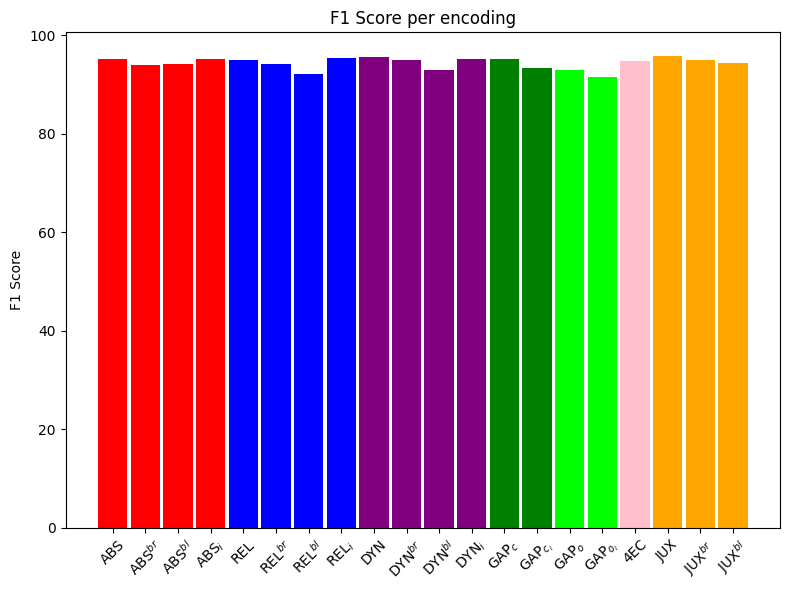

In [9]:
data = {
    "ABS": 95.12,
    "ABS$^{br}$": 94.01,
    "ABS$^{bl}$": 94.15,
    "ABS$_i$": 95.15,

    "REL": 94.99,
    "REL$^{br}$": 94.12,
    "REL$^{bl}$": 92.11,
    "REL$_i$": 95.28,

    "DYN": 95.54,
    "DYN$^{br}$": 94.92,
    "DYN$^{bl}$": 93.02,
    "DYN$_i$": 95.14,

    "GAP$_c$": 95.14,
    "GAP$_{c_i}$": 93.41,

    "GAP$_o$": 93.01,
    "GAP$_{o_i}$": 91.56,

    "4EC": 94.68,

    "JUX": 95.79,  # best
    "JUX$^{br}$": 94.92,
    "JUX$^{bl}$": 94.44,
}
import matplotlib.pyplot as plt

# Define a color palette
colors = ['red', 'red','red','red',
        'blue','blue','blue','blue',
        'purple','purple','purple','purple', 
        'green','green', 
        'lime','lime',
        'pink',
        'orange','orange','orange'] 

# plot as stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.9
x = list(data.keys())
y = list(data.values())

# Set different colors for each bar
ax.bar(x, y, width, color=colors)
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score per encoding for the PENN Treebank')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()  